# Clustering Algorithms -  Centroid-based or Partition Clustering

Centroid-based clustering is the easiest of all the clustering types in data mining. It works on the closeness of the data points to the chosen central value. The datasets are divided into a given number of clusters, and a vector of values references every cluster. The input data variable is compared to the vector value and enters the cluster with minimal difference.

Pre-defining the number of clusters at the initial stage is the most crucial yet most complicated stage for the clustering approach. Despite the drawback, it is a vastly used clustering approach for surfacing and optimizing large datasets. 

## Farthest-first traversal

#### Rationale

The Farthest-First Traversal (FFT) algorithm is a clustering algorithm that is used to group data points into clusters based on their distance from one another. The basic idea behind FFT is to select a starting point and then repeatedly choose the farthest point from the current cluster until a specified number of clusters have been created.

The distance between two points is typically measured using the Euclidean distance metric, which calculates the distance between two points in n-dimensional space as the square root of the sum of the squares of the differences between their corresponding coordinates.

**Euclidian Distance**: we define the Euclidean distance between points v = (v1, ... , vm) and w = (w1, ... , wm) in m-dimensional space, denoted d(v, w):

$$
  d(v, w) = \sqrt{\sum_{i=1}^m  (v_i - w_i)^2}
$$


#### Implementation

Here's how the algorithm works:

1. Select a random data point as the starting point for the first cluster.
2. Find the point that is farthest from the first cluster and assign it to the second cluster.
3. Repeat step 2, but now find the point that is farthest from the first two clusters and assign it to the third cluster.
4. Continue this process until the desired number of clusters have been created.

Let's write it in Python:

In [8]:
import numpy as np
import pandas as pd

def farthest_first_traversal(X, k):
    """
    Implementation of Farthest-First Traversal clustering algorithm
    
    Parameters:
    X: pandas DataFrame, shape (n_samples, n_features)
        The input data to be clustered
    k: int
        The number of clusters to create
        
    Returns:
    centroids: array-like, shape (k, n_features)
        The k centroids chosen by the algorithm
    labels: array-like, shape (n_samples,)
        The cluster assignments for each data point
    """
    # Convert the input DataFrame to a NumPy array
    X = X.values
    
    # Choose a random point as the starting point
    start_point = np.random.choice(X.shape[0], size=1)
    
    # Initialize the set of centroids with the starting point
    centroids = X[start_point]
    
    # Initialize the set of cluster assignments
    labels = np.zeros(X.shape[0])
    
    # Repeat until k centroids have been chosen
    for i in range(1, k):
        # Calculate the distance between each point and the centroids
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Choose the point that is farthest from the existing centroids
        farthest_point = np.argmax(np.min(distances, axis=0))
        
        # Add the farthest point to the centroids
        centroids = np.vstack((centroids, X[farthest_point]))
        
    # Assign each point to the closest centroid
    for i in range(X.shape[0]):
        distances = np.sqrt(((X[i] - centroids)**2).sum(axis=1))
        labels[i] = np.argmin(distances)
    
    return centroids, labels

Now we can test the algorithm on a sample dataset. 

In [9]:
# load data from txt file
data = pd.read_csv("data/rosalind_ba8a.txt", delimiter=" ", header=None)

print(data.head())

      0    1     2     3
0   9.1  0.5   7.7  11.6
1   4.4  7.1  15.4   3.3
2   1.3  3.9  12.4  17.1
3  14.5  5.7   0.7   6.4
4   0.1  5.6  14.2   3.1


In [10]:
centroids, labels = farthest_first_traversal(data, 3)

# Print the centroids DataFrame
centroids_df = pd.DataFrame(data=centroids, columns=data.columns)
print(centroids_df)

      0     1     2     3
0   4.0  10.3  14.7   4.6
1  33.9   2.3  12.8  20.3
2   7.3  42.6   5.5   3.6


Just above is our centroids dataframe. We can now visualize the clusters to which data points have been assigned. Our input data has 4 features, it may be difficult to visualize the cluster assignments using a scatter plot. In this case, we can use a parallel coordinates plot, which plots each data point as a line spanning across all the features.

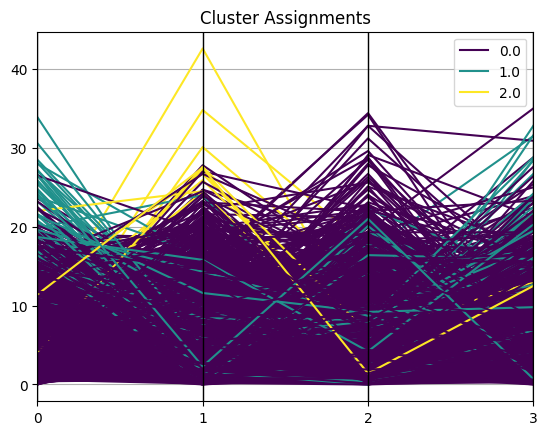

In [11]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Add the cluster assignments to the input data as a new column
data['Cluster'] = labels

# Create a parallel coordinates plot
parallel_coordinates(data, 'Cluster', colormap='viridis')
plt.title('Cluster Assignments')
plt.show()




#### Closing comments

The FFT algorithm is simple to implement and can be quite effective for data sets with well-separated clusters. However, the algorithm has some strong limitations that should be taken into account when considering its use:

1. Sensitivity to initialization: The FFT algorithm is sensitive to the initial choice of the starting point, which can significantly affect the quality of the resulting clustering. If the starting point is far from the true center of the cluster, the algorithm may converge to a suboptimal solution.
2. Lack of flexibility: The FarthestFirstTraversal algorithm is limited to partitioning the data into a fixed number of clusters, specified in advance. This can be a disadvantage when the number of clusters is not known a priori or when the data does not naturally fall into a fixed number of clusters.
3. **Inability to handle noise and outliers**: The FarthestFirstTraversal algorithm does not have a mechanism for handling noise and outliers, which can affect the quality of the resulting clustering. Outliers can be mistakenly assigned to the nearest cluster center, leading to incorrect clustering results.
4. Computationally expensive: The FarthestFirstTraversal algorithm can be computationally expensive, especially for large datasets, since it requires computing pairwise distances between all data points and all cluster centers at each iteration.


## Squared Error Distortion

To address the limitations of methods that select centroids so that they minimize the maximum distance between points in the data and their nearest centroid, let us introduce a new scoring function. **Squared error distortion** can be used to evaluate the performance of a clustering algorithm by calculating the sum of the squared distances between each data point and its assigned cluster centroid. 

Formally, let C be the set of clusters, and let ci be the centroid of cluster i. The squared error distortion can be calculated as follows:

SE = ∑(x - ci)^2

where x is a data point and ci is the centroid of its assigned cluster.

Let's compute the squared error distortion resulting from clustering done with our FTT algorithm. 

In [33]:
def compute_distortion(X, centroids, labels):
    """
    Compute the squared error distortion resulting from clustering
    
    Parameters:
    X: pandas DataFrame, shape (n_samples, n_features)
        The input data that was clustered
    centroids: array-like, shape (k, n_features)
        The centroids returned by the clustering algorithm
    labels: array-like, shape (n_samples,)
        The cluster assignments for each data point
        
    Returns:
    distortion: float
        The squared error distortion resulting from clustering
    """
    # Convert the input DataFrame to a NumPy array
    X = X.values
    
    # Initialize the distortion
    distortion = 0
    
    # Compute the sum of squared distances between each point and its centroid
    for i in range(centroids.shape[0]):
        # Get the indices of the points in the current cluster
        mask = (labels == i)
    
        # Get the points in the current cluster
        cluster_points = X[mask]
    
        # If the current cluster is not empty, compute its distortion
        if len(cluster_points) > 0:
            centroid = np.hstack((centroids[i], 0)).reshape(1, -1)
            
            # Compute the distances between each point in the current cluster and its centroid
            distances = np.sqrt(((cluster_points - centroid)**2).sum(axis=1))
            
            # Add the sum of squared distances to the overall distortion
            distortion += (distances**2).sum()
    
    return distortion


In [35]:
# Compute the distortion
distortion = compute_distortion(data, centroids, labels)

# Print the distortion
print("Squared Error Distortion:", round(distortion,2))

Squared Error Distortion: 246034.45
